# <font color = 'orange'> Model Training of Algerian Forest Fire Dataset

---

### <font color = 'blue'> Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [3]:
df.shape

(243, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


---

In [5]:
df.drop(['day','month','year'],axis = 1,inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


#### <font color = '#AA00FF'> Observation :
* Output feature class is Categorical we have to do label encoding.

---

In [7]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


#### <font color = '#AA00FF'> Observation :
* Now DataFrame is ready to train the model.

---

### We will do regression analysis for FWI feature.

### <font color = 'blue'> 1. Dividing dependent and independent feature.

In [11]:
x = df.drop('FWI',axis = 1)
y = df['FWI']

In [12]:
print(x)
print()
print(y)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       1
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       1
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       1
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       1
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       1
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       2
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       2
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       2
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       2
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       2

[243 rows x 11 columns]

0      0.5
1      0.4
2      0.1
3      0.0
4     

---

### <font color = 'blue'> 2. Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
print('Shape of the Dataset :',df.shape)
print('Shape of the training data :',x_train.shape)
print('Shape of the testing data :',x_test.shape)

Shape of the Dataset : (243, 12)
Shape of the training data : (182, 11)
Shape of the testing data : (61, 11)


---

### <font color = 'blue'> 3. Feature selection based on correlation

#### Highly correlated independent features to be dropped

In [16]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

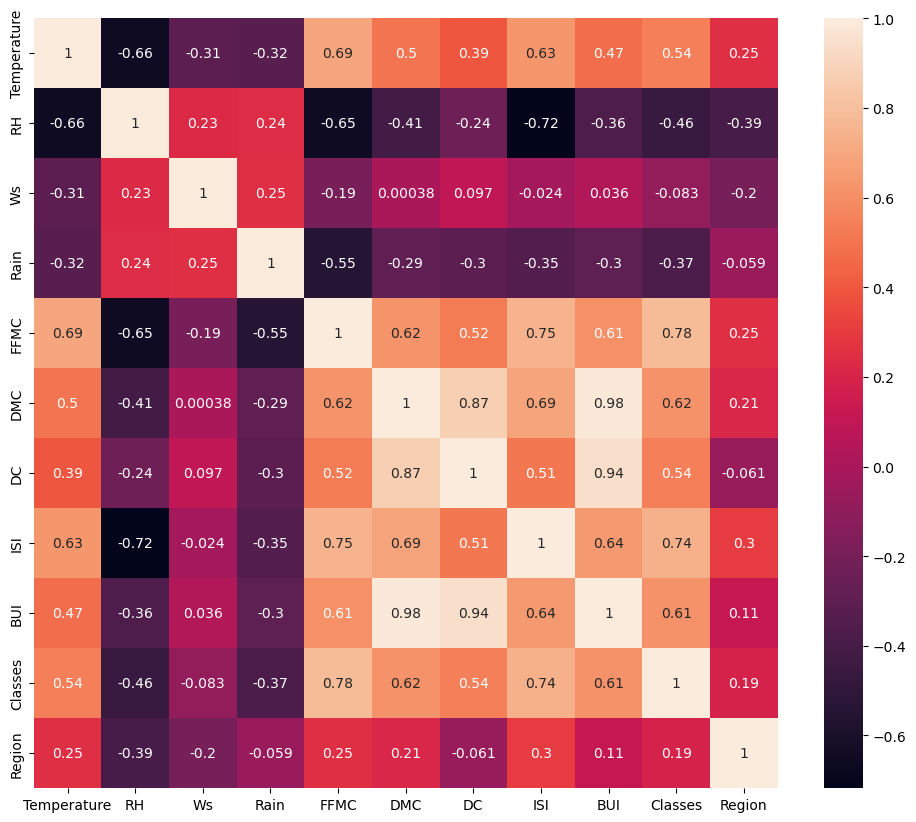

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot = True)

#### <font color = '#AA00FF'> Observation :
* BUI , DC , DMC are highly correlated.

In [18]:
# independent features should be correlated more than thershold if so then drop those features
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    # we consider only lower trianglar matrix 
    # because lower triangle matrix and upper triangle matrix are mirror images 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [19]:
# threshould is given by domain expertise
# highly correlated indpendent features are identified
corr_features = correlation(x_train,threshold = 0.85)

corr_features

{'BUI', 'DC'}

In [20]:
# we have to drop the highly correlated features
x_train.drop(corr_features,axis = 1 , inplace = True)
x_test.drop(corr_features,axis = 1 , inplace = True)

In [21]:
print('Shape of the training data :',x_train.shape)
print('Shape of the testing data :',x_test.shape)

Shape of the training data : (182, 9)
Shape of the testing data : (61, 9)


---

### <font color = 'blue'> 4. Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

#### Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'x_train before scaling')

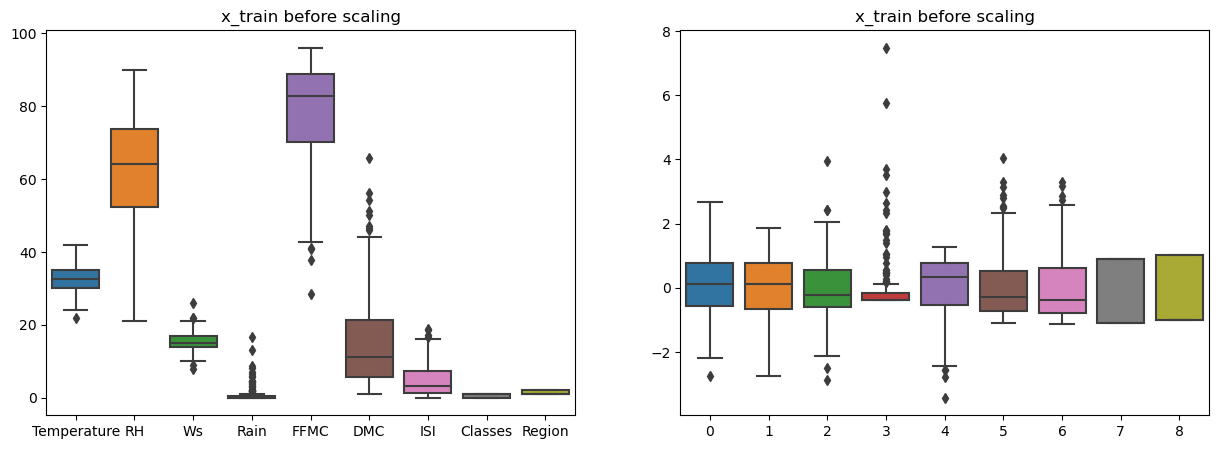

In [24]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x_train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train before scaling')

#### <font color = '#AA00FF'> Observation :
* After standardizing all features will come to same scale.

---

In [25]:
# We maintain Model Accuracy in a dictionary
model_accuracy = []

### <font color = 'blue'> 5.1 Linear regression model training

In [26]:
from sklearn.linear_model import LinearRegression

# model training
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [27]:
# prediction
y_pred = linear_regressor.predict(x_test_scaled)

In [28]:
# error checking
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test , y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 54.68 %


In [29]:
# Calculation of accuracy 
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 98.48 %


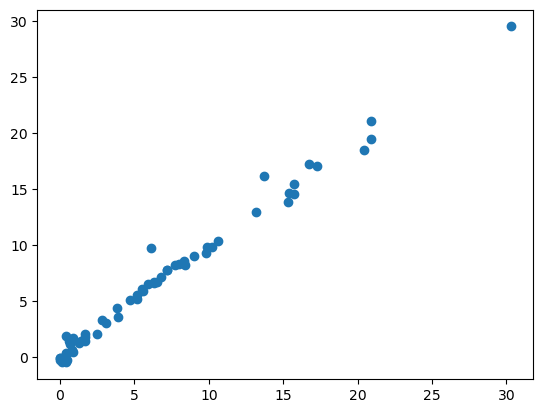

In [30]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.

---

### <font color = 'blue'> 5.2.1 Lasso regression model training

In [31]:
from sklearn.linear_model import Lasso

# model training
lasso_regressor = Lasso()
lasso_regressor.fit(x_train_scaled,y_train)

Lasso()

In [32]:
# predication
y_pred = lasso_regressor.predict(x_test_scaled)

In [33]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 113.32 %


In [34]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 94.92 %


#### <font color = '#AA00FF'> Observation :
* Accuracy has decreased because for cost function we add hyperparameter to do feature selection.
* it one point cost function becomes 0 where the feature which is less correlated to output will become 0.

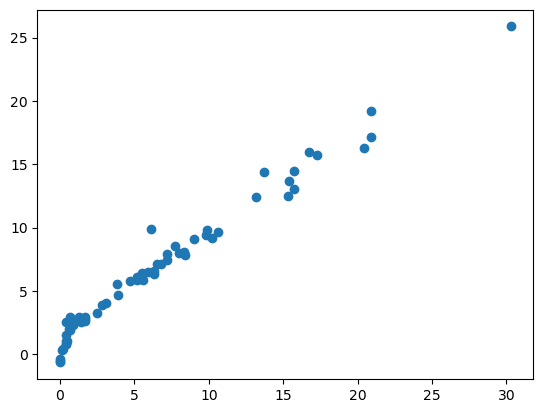

In [35]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.

---

### <font color = 'blue'> 5.2.2 Cross Validation Lasso model training

In [36]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [37]:
# predication
y_pred = lassocv.predict(x_test_scaled)

In [38]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 62.0 %


In [39]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 98.21 %


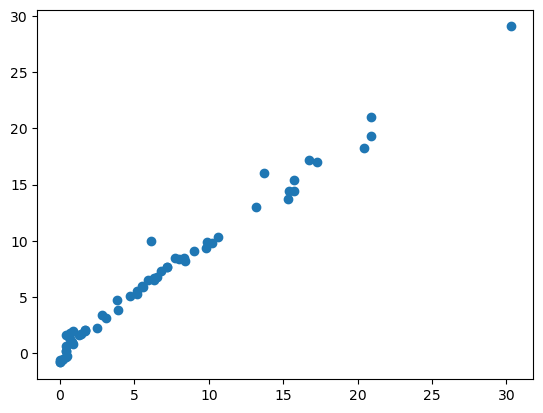

In [40]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.
* Cross validation will definately give very good accuracy.

---

### <font color = 'blue'> 5.3.1 Ridge Regression model training

In [41]:
from sklearn.linear_model import Ridge

# model training
ridge_regressor = Ridge()
ridge_regressor.fit(x_train_scaled,y_train)

Ridge()

In [42]:
# prediction
y_pred = ridge_regressor.predict(x_test_scaled)

In [43]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 56.42 %


In [44]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 98.43 %


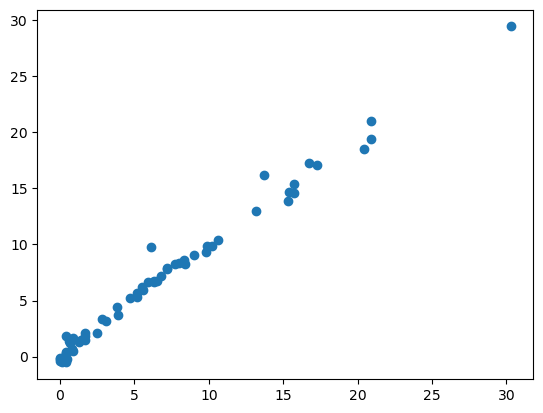

In [45]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.

---

### <font color = 'blue'> 5.3.2 Ridge Regression Cross validation model training

In [46]:
from sklearn.linear_model import RidgeCV

# model training
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [47]:
# prediction
y_pred = ridgecv.predict(x_test_scaled)

In [48]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 56.42 %


In [49]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 98.43 %


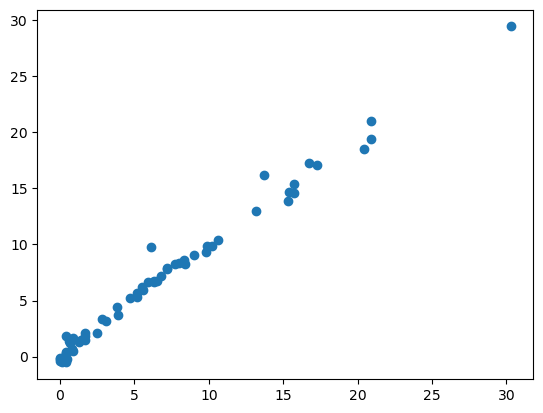

In [50]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.
* But, here the accuracy remain same not a problem.

In [51]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

---

### <font color = 'blue'> 5.4.1 Elastic Net Regression model training

In [52]:
from sklearn.linear_model import ElasticNet

# training
elastinet_regressor = ElasticNet()
elastinet_regressor.fit(x_train_scaled,y_train)

ElasticNet()

In [53]:
# prediction
y_pred = elastinet_regressor.predict(x_test_scaled)

In [54]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 188.22 %


In [55]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 87.53 %


#### <font color = '#AA00FF'> Observation :
* Accuracy is decreased because it is the combination of ridge and lasso regression.
* it helps in reducing overfitting and also feature selection.

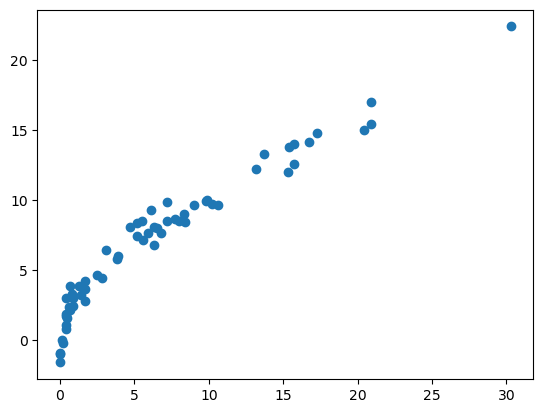

In [56]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are not linear completely.

---

### <font color = 'blue'> 5.4.2 Elastic Net Regression Cross validation model training

In [57]:
from sklearn.linear_model import ElasticNetCV

# training
elastinet_cv = ElasticNetCV(cv = 5)
elastinet_cv.fit(x_train_scaled,y_train)

ElasticNetCV(cv=5)

In [58]:
# prediction
y_pred = elastinet_cv.predict(x_test_scaled)

In [59]:
# error calculation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error :',round(mae*100,2),'%')

Mean Absoulte Error : 65.76 %


In [60]:
# Accuracy calculation
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
model_accuracy.append(r2)
print('R square score: Accuracy =',round(r2*100,2),'%')

R square score: Accuracy = 98.14 %


#### <font color = '#AA00FF'> Observation :
* Accuracy is increased using Cross validation

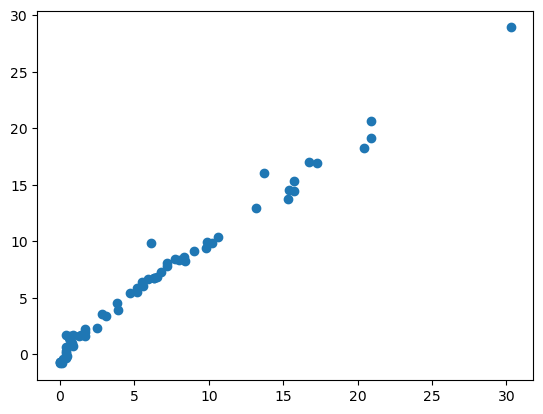

In [61]:
# Assumption
plt.scatter(y_test,y_pred)

#### <font color = '#AA00FF'> Observation :
* As the data points are linearly aligned we can say that our model is trained very well.
* Cross validation will definately give very good accuracy.

#### Now, we will pick the best accuracy model and convert it into pickle file then use pickle file in deployment

---

### <font color = 'blue'> 6. Picking best model.

In [70]:
# combining all the model and the accuracy 
model_name = ['Linear Regression','Lasso Regression','Lasso Regression CV','Ridge Regression','Ridge Regression CV','Elastic Net Regression','Elastic Net Regression CV']

accuracy_df = pd.DataFrame({'Model Name':model_name,'Accuracy':model_accuracy})

In [71]:
accuracy_df

,Model Name,Accuracy
0,Linear Regression,0.984766
1,Lasso Regression,0.949202
2,Lasso Regression CV,0.982095
3,Ridge Regression,0.984299
4,Ridge Regression CV,0.984299
5,Elastic Net Regression,0.875346
6,Elastic Net Regression CV,0.981422


In [79]:
accuracy_df.max()

Model Name    Ridge Regression CV
Accuracy                 0.984766
dtype: object

#### <font color = '#AA00FF'> Observation :
* As Ridge or RidgeCV Regression accuracy is more we use ridge regression for deploying model.

---

### <font color = 'blue'> 7. Pickling the model and Preprocessing model(For Standardization)

In [73]:
# Standardization is done use Scaler object

scaler

StandardScaler()

In [80]:
# Prediction is done by Ridge Regression model

ridge_regressor

Ridge()

In [81]:
import pickle 

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_regressor,open('ridge.pkl','wb'))

---

### <font color = 'blue'> 8. For any new data

In [82]:
# We do this in virtual environment 

scaler_pkl = pickle.load(open('scaler.pkl','rb'))
regressor_pkl = pickle.load(open('ridge.pkl','rb'))

In [84]:
x_train_scaled[0]

array([-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
       -0.88272888, -0.62963326, -1.10431526, -0.98907071])

In [95]:
new_data = [-0.84284248,0.78307967,1.29972026,-0.33727373, -0.12805583,-0.88272888, -0.62963326, -1.10431526, -0.98907071]

scaled_new_data = scaler_pkl.fit_transform([new_data])
prediction = regressor_pkl.predict(scaled_new_data)

print('New data :',new_data)
print()
print('Prediction :',prediction)

New data : [-0.84284248, 0.78307967, 1.29972026, -0.33727373, -0.12805583, -0.88272888, -0.62963326, -1.10431526, -0.98907071]

Prediction : [7.15604396]


---